Quadrupedal Walking Frog Code

This code analyses the force and kinematic data for multiple frog species walked across a multi-axis force platform. The x, y, and z forces were analysed. Using the x, y and z force data, we calculate the resultant force (). Joint angle data was collect via digitization of high-speed videography in two views (dorsal and lateral) over two strides for the fore- and hindlimbs.
Contributors:
J Fabian Dubon
M Kearns
CM Reynaga
Last updated:
Dec 28, 2022 /April 5, 2024




Setting Directory 

In [192]:
import pandas as pd 
import numpy as np 
import openpyxl as pyxl  
import matplotlib.pyplot as plt
import math as math
 
#'/Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets/walks_workbook.xlsx'


Parameters
A single stride was defined as: The start of the stride begins the moment the forelimb phallange/limb closest to the lateral veiew camera makes contact with the ground. The stride ends once all limbs have cycled through, until the start of the same forelimb is about to make contact again with the ground to begin a new stride.
Video Information
This section will read in the parameters from the following imported excel sheet.
Defines a variable with the file name as a string

In [144]:
params = '/Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets/walks_workbook.xlsx'


Imports data file and saves the file as a struct named parameters, the struct is organized as within two fields (1) data and (2) textdata. Any column names or text values within the spreadsheet will be in textdata and any numerical values will be in data.

In [145]:
parameters = pd.read_excel(params)

elects which row to process within the excel parameters sheet
Change number based upon the row you'd like to process within the excel spread sheet and save the matlab code before you run the code

In [146]:
excel_row_to_process = 2 #must start at 2 bc of pandas structure
film_side_right = True

Video/Force Sampling Information
Reading in parameters from excel sheet.


In [147]:
row_to_process = excel_row_to_process-1

# Print the size of the parameters variable
display(parameters.shape)

if 'Date' in parameters.columns:
    date = str(int(parameters['Date'].iloc[row_to_process])) #iloc is more of a personal pref #must change to int first to get rid off .0 
else:
    print("Error: 'Date' not found in DataFrame")

genus_species = 'pb' # Phrynomantis bifasciatus

if 'Ind.' in parameters.columns:
    individual = str(int(parameters['Ind.'].iloc[row_to_process]))
else:
    print("Error: 'Ind.' not found in DataFrame")

if 'Walk' in parameters.columns:
    walk_num = str(int(parameters['Walk'].iloc[row_to_process]))
else:
    print("Error: 'Walk' not found in DataFrame")

print(walk_num)
walk_seq = date + '_' + genus_species + individual + '_walk'+ walk_num 
fps = 250

print(walk_seq)


(62, 30)

2
20210706_pb4_walk2


In [148]:

""" this is for me to try different approaches.


row_to_process = excel_row_to_process-1

# Print the size of the parameters variable
display(parameters.shape)

type(parameters) #gets the type 

if 'Date' in parameters.columns:
    date = str(parameters['Date'].iloc[row_to_process])

else:
    print("Error: Date not found in DataFrame")
    
print(date)
    
if 'Ind.' in parameters.columns:
    individual = str(parameters['Ind.'][row_to_process])

else:
    print('Error')    
    
print(individual)

type(individual)


#set up variables to right columns 
#date = str(parameters.Date[row_to_process])


walk_seq = date,'_', genus_species, individual, '_walk', walk_num #append has a limited num of arguments
#so the best way to concatenate strings is to add the '+ ' sign in between 
#print(date)

#type(date)
#parameters.info() #gets the """



' this is for me to try different approaches.\n\n\nrow_to_process = excel_row_to_process-1\n\n# Print the size of the parameters variable\ndisplay(parameters.shape)\n\ntype(parameters) #gets the type \n\nif \'Date\' in parameters.columns:\n    date = str(parameters[\'Date\'].iloc[row_to_process])\n\nelse:\n    print("Error: Date not found in DataFrame")\n    \nprint(date)\n    \nif \'Ind.\' in parameters.columns:\n    individual = str(parameters[\'Ind.\'][row_to_process])\n\nelse:\n    print(\'Error\')    \n    \nprint(individual)\n\ntype(individual)\n\n\n#set up variables to right columns \n#date = str(parameters.Date[row_to_process])\n\n\nwalk_seq = date,\'_\', genus_species, individual, \'_walk\', walk_num #append has a limited num of arguments\n#so the best way to concatenate strings is to add the \'+ \' sign in between \n#print(date)\n\n#type(date)\n#parameters.info() #gets the '

In [149]:
#frames per second (fps) high speed video frame rate
igor_sr = 10000

if 'Ind. Weight (g)' in parameters.columns:
    body_mass = parameters['Ind. Weight (g)'].iloc[row_to_process]
else:
    print("Error: 'Ind. Weight (g)' not found in DataFrame")

print(body_mass) #prints are to make sure results are the same

5.77


 *Video Conditions*
 Determines whether the code should run data on the forelimb or the hindlimb.
 A value of 1 will run analysis for the relevent limbs, however a value of 0
 will skip those sections for analysis within the script. Additionally, |Overlap|
 is used to distinguish when the fore- and hindlimb are both in contact with
 the force plate, and thus individual limb analysis during that time can not
 be done.

In [150]:
#these variables  are floats so they got 0.0 
if 'Forelimb Status (0/1)' in parameters.columns:
    FL = parameters['Forelimb Status (0/1)'].iloc[row_to_process]
else:
    print("Error: 'Forelimb Status (0/1)' not found in DataFrame")

print(FL)

if 'Hindlimb Status (0/1)' in parameters.columns:
    HL = parameters['Hindlimb Status (0/1)'].iloc[row_to_process]
else:
    print("Error: 'Hindlimb Status (0/1)' not found in DataFrame")

print(HL)

if 'Overlap (0/1)' in parameters.columns:
    Overlap = parameters['Overlap (0/1)'].iloc[row_to_process]
else:
    print("Error: 'Overlap (0/1)' not found in DataFrame")
print(Overlap)



1.0
0.0
1.0


Walk Sequence Information
Converting video frames into time (sec)

In [151]:
if 'tot. dltdv8 frames' in parameters.columns:
    totalf = parameters['tot. dltdv8 frames'].iloc[row_to_process] # total amount of video frames
else:
    print("Error: 'tot. dltdv8 frames' not found in DataFrame")
print(totalf)

678.0


In [152]:
#totalf_sec is rounded here to the same decimals place as the force data frequency
totalf_sec = round((totalf/fps),4) #total amount of time filmed (sec)
print(totalf_sec)

2.712


Defining Stride 1
Beginning frame for stride 1 defined when forelimb (or phalange of the forelimb) nearest to the camera touches the ground


In [153]:
if 'Forelimb Start frame' in parameters.columns:
    startf_s1 = parameters['Forelimb Start frame'].iloc[row_to_process]-1 #bc of indexing in python, it starts at 97 not 98 (ensures the pt1_X are the same in matlab and python)
else:
    print("Error: 'Forelimb Start frame' not found in DataFrame")
print(startf_s1)
print(row_to_process)

startf_s1_sec = round((startf_s1/fps),4)
print(startf_s1_sec)


97.0
1
0.388


End frame for stride 1 
Defined as the frame right before the forelimb touches back to start the next stride

In [154]:
if 'Stride 1 end frame' in parameters.columns:
    endf_s1 = parameters['Stride 1 end frame'].iloc[row_to_process]-1 #same here, it ends at 294
else:
    print("Error: 'Stride 1 end frame' not found in DataFrame")
print(endf_s1)

294.0


Conversion from frames to time (sec) by dividing by frame rate or recording frequency in frames per second (fps).

time(sec) = frame #/fps

In [155]:
endf_s1_sec = round((endf_s1/fps),4)
print(endf_s1_sec)

1.176


Defining Stride 2
 See section above for more information on defining a stride and calculating
 time from frame number for a stride.


In [156]:
if 'Stride 2 Start frame' in parameters.columns:
    startf_s2 = parameters['Stride 2 Start frame'].iloc[row_to_process]
else:
    print("Error: 'Stride 2 Start frame' not found in DataFrame")
print(startf_s2)

startf_s2_sec = round((startf_s2/fps),4)
print(startf_s2_sec)

296.0
1.184


End frame for stride 2;
If not a complete 2ns stride insert '0' within parameters excel sheet (however at this point we should only be analyzing walks with 2 complete strides).

In [157]:
if 'Stride 2 end frame' in parameters.columns:
    endf_s2 = parameters['Stride 2 end frame'].iloc[row_to_process]
else:
    print("Error: 'Stride 2 end frame' not found in DataFrame")
print(endf_s2)

endf_s2_sec = round((endf_s2/fps),4)
print(endf_s2_sec)

0
0.0


Characterizing Igor time based upon trigger time
 Finding when the cameras and data collection in Igor were triggered off.
 format long g % if not displaying full decimal


In [158]:
if 'Igor trigger time' in parameters.columns:
    trigger_row = parameters['Igor trigger time'].iloc[row_to_process]
else:
    print("Error: 'Igor trigger time' not found in DataFrame")
print(trigger_row)

trigger_t = trigger_row/10000
print(trigger_t)

8714.0
0.8714


Creating a time array for forceplate data. 
 Igor|_sr| = sampling rate. Plus rounding to the correct decimals place based upon the Igor sampling frequency (1000) force recording for a total of 10 seconds.

In [159]:
force_t = np.arange(1, igor_sr + 1)/1000

force_time = np.round(force_t, 4)
print(force_time.size)

10000


FL and HL Contact Timing
  Defining relative to time when the forelimb and hindlimb are in contact with  the force plate.

 |fl_end| = last frame the front finger/hand is in contact with the force plate before leaving

In [160]:
if 'Forelimb end frame' in parameters.columns:
    fl_end = parameters['Forelimb end frame'].iloc[row_to_process]
else:
    print("Error: 'Forelimb end frame' not found in DataFrame")
print(fl_end)

fl_end_sec = round((fl_end/fps),4); # converting to time
print(fl_end_sec)

270.0
1.08


hl_start:
 when a toe/foot touches the force plate/hindlind makes contact with the forceplate for the first time.

In [161]:
if 'Hindlimb Start frame' in parameters.columns:
    hl_start = parameters['Hindlimb Start frame'].iloc[row_to_process]
else:
    print("Error: 'Hindlimb Start frame' not found in DataFrame")
print(hl_start)

hl_start_sec = round((hl_start/fps),4); # converting to time
print(hl_start_sec)

239.0
0.956


hl_end:
 last frame back toe touches force plate before leaving

In [162]:
if 'Hindlimb end frame' in parameters.columns:
    hl_end = parameters['Hindlimb end frame'].iloc[row_to_process]
else:
    print("Error: 'Hindlimb end frame' not found in DataFrame")
print(hl_end)

hl_end_sec = round((hl_end/fps),4); # converting to time
print(hl_end_sec)

0.0
0.0


Determining Periods of Overlap
 Isolating FL and HL contact only periods
 During most walks the FL and HL will both be in contact with the force plate
 midway between stride 1 and stride 2. Therefore, we only analyze the forces
 recorded when and individual limb is in contact with the force platform. More
 specifically, we only analyze the forelimb contact period during the time before
 the hindlimb touches down. And analyze the hindlimb contact during the time
 after the forelimb has left the force plate.

 |fl_only_end| = frame where only the FL leaves contact with the force plate,
 then converting to time (sec).


In [163]:
# MAYBE DO TODO will need a conditional statement for walks where there isn't overlap
fl_only_end = hl_start-1
print(fl_only_end)
fl_only_end_sec = round((fl_only_end/fps),4)
print(fl_only_end_sec)


238.0
0.952


hl_only_start:
 start frame where the HL is the only one that is in contact with the force plate, then converting frames to time (sec).

In [164]:
hl_only_start = fl_end+1
print(hl_only_start)
hl_only_start_sec = round((hl_only_start/fps),4)
print(hl_only_start_sec)

271.0
1.084


Changing reference frame of the video land markers

Finding the distance in time from the end of the video, to set-up and align time relative to the trigger time. And ultimately determine where force occurs relative to trigger and video timing. Example conversion equations provided:

    time = t_video_length - t_event_start

In [165]:
delta_s1_start = totalf_sec - startf_s1_sec
print(delta_s1_start)
delta_hl_on = totalf_sec-hl_start_sec
print(delta_hl_on)
delta_fl_end = totalf_sec-fl_end_sec
print(delta_fl_end)
delta_s1_end = totalf_sec-endf_s1_sec
print(delta_s1_end)
delta_s2_start = totalf_sec-startf_s2_sec
print(delta_s2_start)
delta_hl_end = totalf_sec-hl_end_sec
print(delta_hl_end)
delta_s2_end = totalf_sec-endf_s2_sec
print(delta_s2_end)

delta_fl_only_end = totalf_sec - fl_only_end_sec
print(delta_fl_only_end)
delta_hl_only_start = totalf_sec - hl_only_start_sec
print(delta_hl_only_start)


2.3240000000000003
1.7560000000000002
1.6320000000000001
1.5360000000000003
1.5280000000000002
2.712
2.712
1.7600000000000002
1.6280000000000001


Importing Digitized Data Points

All videos for K. senegalensis were digitized with the assigned point number values.
FIXIT Note: this will differ across different species unfortunately.
Eye
Elbow
Wrist
Shoulder
Knee
Ankle
Hip
Knee
Tarsometatarsal (HL)
Tarsometatarsal (LF)

Importing digitized XYZ pts spreadsheet
Imports xyz points as a struct/tuple named xyzpts

In [166]:
xyzfile = walk_seq + '_xyzpts.csv'
xyzfile = '/Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets/' + xyzfile
print('/Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets/' + xyzfile)
xyzpts = pd.read_csv(xyzfile)

print(xyzpts.shape) #different than matalab (matlab = 311x30, but this is the same as excel sheet)

print(type(xyzpts.shape))

/Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets//Users/jenifer_dubon/Desktop/walking_frog_force/walking_frog_force/Datasets/20210706_pb4_walk2_xyzpts.csv
(678, 30)
<class 'tuple'>


Assigning points as variables from the imported spreadsheet matrix xyzpts struct/Tuple


In order to make sure that MATLAB orients the data correctly, we assign the point values to the individual columns, and specify the frame number range separated by a column that we want to grab data from. Importanting relative to stride 1 and 2. The number designates the excel sheet row to look for.x

In [167]:
#display(xyzpts)
print( startf_s1)
print(endf_s1)
print(type( xyzpts.iloc[1].shape))

for col in xyzpts.columns:
    row_section_s1 = xyzpts[col][int(startf_s1):int(endf_s1) + 1]
    #display('row_section_s1', row_section_s1)
    if 'pt1_X' in col:
        pt1_X_s1 = row_section_s1 
    elif 'pt1_Y' in col:
        pt1_Y_s1 = row_section_s1
    elif 'pt1_Z' in col:
        pt1_Z_s1 = row_section_s1
        
    elif 'pt2_X' in col:
        pt2_X_s1 = row_section_s1 
    elif 'pt2_Y' in col:
        pt2_Y_s1 = row_section_s1
    elif 'pt2_Z' in col:
        pt2_Z_s1 = row_section_s1 
        
    elif 'pt3_X' in col:
        pt3_X_s1 = row_section_s1
    elif 'pt3_Y' in col:
        pt3_Y_s1 = row_section_s1
    elif 'pt3_Z' in col:
        pt3_Z_s1 = row_section_s1  
        
    elif 'pt4_X' in col:
        pt4_X_s1 = row_section_s1     
    elif 'pt4_Y' in col:
        pt4_Y_s1 = row_section_s1
    elif 'pt4_Z' in col:
        pt4_Z_s1 = row_section_s1
    
    elif 'pt5_X' in col:
        pt5_X_s1 = row_section_s1
    elif 'pt5_Y' in col:
        pt5_Y_s1 = row_section_s1
    elif 'pt5_Z' in col:
        pt5_Z_s1 = row_section_s1
    
    elif 'pt6_X' in col:
        pt6_X_s1 = row_section_s1
    elif 'pt6_Y' in col:
        pt6_Y_s1 = row_section_s1
    elif 'pt6_Z' in col:
        pt6_Z_s1 = row_section_s1
    
    elif 'pt7_X' in col:
        pt7_X_s1 = row_section_s1
    elif 'pt7_Y' in col:
        pt7_Y_s1 = row_section_s1
    elif 'pt7_Z' in col:
        pt7_Z_s1 = row_section_s1
        
    elif 'pt8_X' in col:
        pt8_X_s1 = row_section_s1
    elif 'pt8_Y' in col:
        pt8_Y_s1 = row_section_s1
    elif 'pt8_Z' in col:
        pt8_Z_s1 = row_section_s1
        
    elif 'pt9_X' in col:
        pt9_X_s1 = row_section_s1
    elif 'pt9_Y' in col:
        pt9_Y_s1 = row_section_s1
    elif 'pt9_Z' in col:
        pt9_Z_s1 = row_section_s1
        
    elif 'pt10_X' in col:
        pt10_X_s1 = row_section_s1
    elif 'pt10_Y' in col:
        pt10_Y_s1 = row_section_s1
    elif 'pt10_Z' in col:
        pt10_Z_s1 = row_section_s1
        
#print(xyzpts.columns)
#display('row_section_s1', row_section_s1)
#print(row_section) check the sections are correct
display(pt2_Z_s1)


97.0
294.0
<class 'tuple'>


97     73.954070
98     73.936965
99     73.965687
100    74.061839
101    74.689817
         ...    
290    75.110863
291    75.562327
292    75.944462
293    76.058882
294    76.427859
Name: pt2_Z, Length: 198, dtype: float64

If data set has hindlimb data


In [168]:
print('startf_s2 =', startf_s2)
print('endf_s2 =', endf_s2)
print

#xyzpts FILES HAS NO HL DATA SO THIS IS NOT USED FOR THAT(RETURNS NOTHING)

###CHECK THIS WITH HL DATA 
#display(xyzpts.columns)


"""if HL == 1:
    for col in xyzpts.columns:
        row_section_s2 = xyzpts[col][int(startf_s2):int(endf_s2) + 1]
        display('row_section_s2', row_section_s2)
        if 'pt1_X' in col:
            pt1_X_s2 = row_section_s2
        #elif 'pt1_Y' in col:
         #   pt1_Y_s2 = row_section_s2
            
display('row_section_s2', pt1_X_sn1)
"""
if HL == 1:
    for col in xyzpts.columns:
        row_section_s2 = xyzpts[col][int(startf_s2):int(endf_s2) + 1]
        display('row_section_s2', row_section_s2)
        if 'pt1_X' in col:
            pt1_X_s2 = row_section_s2 
        elif 'pt1_Y' in col:
            pt1_Y_s2 = row_section_s2
        elif 'pt1_Z' in col:
            pt1_Z_s2 = row_section_s2
            
        elif 'pt2_X' in col:
            pt2_X_s2 = row_section_s2 
        elif 'pt2_Y' in col:
            pt2_Y_s2 = row_section_s2
        elif 'pt2_Z' in col:
            pt2_Z_s2 = row_section_s2 
            
        elif 'pt3_X' in col:
            pt3_X_s2 = row_section_s2
        elif 'pt3_Y' in col:
            pt3_Y_s2 = row_section_s2
        elif 'pt3_Z' in col:
            pt3_Z_s2 = row_section_s2  
            
        elif 'pt4_X' in col:
            pt4_X_s2 = row_section_s2     
        elif 'pt4_Y' in col:
            pt4_Y_s2 = row_section_s2
        elif 'pt4_Z' in col:
            pt4_Z_s2 = row_section_s2
        
        elif 'pt5_X' in col:
            pt5_X_s2 = row_section_s2
        elif 'pt5_Y' in col:
            pt5_Y_s2 = row_section_s2
        elif 'pt5_Z' in col:
            pt5_Z_s2 = row_section_s2
        
        elif 'pt6_X' in col:
            pt6_X_s2 = row_section_s2
        elif 'pt6_Y' in col:
            pt6_Y_s2 = row_section_s2
        elif 'pt6_Z' in col:
            pt6_Z_s2 = row_section_s2
        
        elif 'pt7_X' in col:
            pt7_X_s2 = row_section_s2
        elif 'pt7_Y' in col:
            pt7_Y_s2 = row_section_s2
        elif 'pt7_Z' in col:
            pt7_Z_s2 = row_section_s2
            
        elif 'pt8_X' in col:
            pt8_X_s2 = row_section_s2
        elif 'pt8_Y' in col:
            pt8_Y_s2 = row_section_s2
        elif 'pt8_Z' in col:
            pt8_Z_s2 = row_section_s2
            
        elif 'pt9_X' in col:
            pt9_X_s2 = row_section_s2
        elif 'pt9_Y' in col:
            pt9_Y_s2 = row_section_s2
        elif 'pt9_Z' in col:
            pt9_Z_s2 = row_section_s2
            
        elif 'pt10_X' in col:
            pt10_X_s2 = row_section_s2
        elif 'pt10_Y' in col:
            pt10_Y_s2 = row_section_s2
        elif 'pt10_Z' in col:
            pt10_Z_s2 = row_section_s2
        #if 'pt1_
else: 
    print('Error: not hl data in file ' ) #not sure if its needed
        
#display(row_section_s2)

startf_s2 = 296.0
endf_s2 = 0
Error: not hl data in file 


Both stride 1 and 2 digitized points concatinated into one array

TODO maybe make the cat the final version so even if there is only one FL data that's where we're getting all the calculations from.

In [169]:
if HL == 1:
    pt1_X = np.concatenate(pt1_X_s1, pt1_X_s2)
    print(pt1_X)
    pt1_Y = np.concatenate(1, pt1_Y_s1, pt1_Y_s2)
    pt1_Z = np.concatenate(1, pt1_Z_s1, pt1_Z_s2)
    
    pt2_X = np.concatenate(1, pt2_X_s1, pt2_X_s2)
    pt2_Y = np.concatenate(1, pt2_Y_s1, pt2_Y_s2)
    pt2_Z = np.concatenate(1, pt2_Z_s1, pt2_Z_s2)
    
    pt3_X = np.concatenate(1, pt3_X_s1, pt3_X_s2)
    pt3_Y = np.concatenate(1, pt3_Y_s1, pt3_Y_s2)
    pt3_Z = np.concatenate(1, pt3_Z_s1, pt3_Z_s2)
    
    pt4_X = np.concatenate(1, pt4_X_s1, pt4_X_s2)
    pt4_Y = np.concatenate(1, pt4_Y_s1, pt4_Y_s2)
    pt4_Z = np.concatenate(1, pt4_Z_s1, pt4_Z_s2)
    
    pt5_X = np.concatenate(1, pt5_X_s1, pt5_X_s2)
    pt5_Y = np.concatenate(1, pt5_Y_s1, pt5_Y_s2)
    pt5_Z = np.concatenate(1, pt5_Z_s1, pt5_Z_s2)
    
    pt6_X = np.concatenate(1, pt6_X_s1, pt6_X_s2)
    pt6_Y = np.concatenate(1, pt6_Y_s1, pt6_Y_s2)
    pt6_Z = np.concatenate(1, pt6_Z_s1, pt6_Z_s2)
    
    pt7_X = np.concatenate(1, pt7_X_s1, pt7_X_s2)
    pt7_Y = np.concatenate(1, pt7_Y_s1, pt7_Y_s2)
    pt7_Z = np.concatenate(1, pt7_Z_s1, pt7_Z_s2)
    
    pt8_X = np.concatenate(1, pt8_X_s1, pt8_X_s2)
    pt8_Y = np.concatenate(1, pt8_Y_s1, pt8_Y_s2)
    pt8_Z = np.concatenate(1, pt8_Z_s1, pt8_Z_s2)
    
    pt9_X = np.concatenate(1, pt9_X_s1, pt9_X_s2)
    pt9_Y = np.concatenate(1, pt9_Y_s1, pt9_Y_s2)
    pt9_Z = np.concatenate(1, pt9_Y_s1, pt9_Y_s2)
    
    pt10_X = np.concatenate(1, pt10_X_s1, pt10_X_s2)
    pt10_Y = np.concatenate(1, pt10_Y_s1, pt10_Y_s2)
    pt10_Z = np.concatenate(1, pt10_Y_s1, pt10_Y_s2)
    

Timing and Percent Stride

Creating Percent Stride for Digitized Data (Stride 1 and 2) Finding percent stride for stride 1 and 2
size finds the array size from the start of the stride to the end using the first and last frame of the strides

In [170]:
stride1array = np.arange(startf_s1, endf_s1 + 1)

stride1size = stride1array.size #(97, 294)- python 
print(stride1size)              #(98, 295)- matlab 


198


Calculates the percent stride array use to standardize across different walking trials, changes the time component usually at the x-axis values to plot y-axis variables of interest (e.g. force, torques, etc.) since every stride is going to be a different length in time.

In [171]:
stride1_a = np.arange(1, stride1size + 1)

p_stride1 = (stride1_a/ stride1size) * 100
display(p_stride1)  #197 rows python

array([  0.50505051,   1.01010101,   1.51515152,   2.02020202,
         2.52525253,   3.03030303,   3.53535354,   4.04040404,
         4.54545455,   5.05050505,   5.55555556,   6.06060606,
         6.56565657,   7.07070707,   7.57575758,   8.08080808,
         8.58585859,   9.09090909,   9.5959596 ,  10.1010101 ,
        10.60606061,  11.11111111,  11.61616162,  12.12121212,
        12.62626263,  13.13131313,  13.63636364,  14.14141414,
        14.64646465,  15.15151515,  15.65656566,  16.16161616,
        16.66666667,  17.17171717,  17.67676768,  18.18181818,
        18.68686869,  19.19191919,  19.6969697 ,  20.2020202 ,
        20.70707071,  21.21212121,  21.71717172,  22.22222222,
        22.72727273,  23.23232323,  23.73737374,  24.24242424,
        24.74747475,  25.25252525,  25.75757576,  26.26262626,
        26.76767677,  27.27272727,  27.77777778,  28.28282828,
        28.78787879,  29.29292929,  29.7979798 ,  30.3030303 ,
        30.80808081,  31.31313131,  31.81818182,  32.32

Provides percent stride for stride 2 and concatenates stride 1 and 2 together

In [172]:
if HL == 1:
    stride2array = np.arange(startf_s2, endf_s2 + 1)

    stride2size = stride2array.size  
    print(stride2size)
    
    stride2_a = np.arange(1, stride2size + 1)

    p_stride2 = (stride2_a/ stride2size) * 100
    display(p_stride2)  
    
    #% concatinating forelimb and hindlimb percent stride
    total_digitized_pstride = np.concatenate(1, p_stride1, p_stride2 + 1)  # + 1 so it includes all of it  # Use for videos with both FL and HL digitized data
    
elif HL== 0:
    total_digitized_pstride =  p_stride1 #  BC HL ==0 only use p_stride1 # use for videos with both FL and HL digitized data
    display(total_digitized_pstride)


array([  0.50505051,   1.01010101,   1.51515152,   2.02020202,
         2.52525253,   3.03030303,   3.53535354,   4.04040404,
         4.54545455,   5.05050505,   5.55555556,   6.06060606,
         6.56565657,   7.07070707,   7.57575758,   8.08080808,
         8.58585859,   9.09090909,   9.5959596 ,  10.1010101 ,
        10.60606061,  11.11111111,  11.61616162,  12.12121212,
        12.62626263,  13.13131313,  13.63636364,  14.14141414,
        14.64646465,  15.15151515,  15.65656566,  16.16161616,
        16.66666667,  17.17171717,  17.67676768,  18.18181818,
        18.68686869,  19.19191919,  19.6969697 ,  20.2020202 ,
        20.70707071,  21.21212121,  21.71717172,  22.22222222,
        22.72727273,  23.23232323,  23.73737374,  24.24242424,
        24.74747475,  25.25252525,  25.75757576,  26.26262626,
        26.76767677,  27.27272727,  27.77777778,  28.28282828,
        28.78787879,  29.29292929,  29.7979798 ,  30.3030303 ,
        30.80808081,  31.31313131,  31.81818182,  32.32

Isolating Percent Stride Range for FL and HL Only Contact times

Isolating the % stride timing in which the FL is only in contact and when the HL is only in contact
TODO I think this is in terms of video %

In [173]:
stride1size_fl = np.arange(startf_s1, fl_end ) #rn its 97, 269 in py and   *** total time FL is in contact (includes overlap)
display(stride1size_fl.shape)                     #i think fl_end should be 269 her but its 270 like matlab, (check thsi is correct when doing mat operations)

stride1size_only_fl = np.arange(startf_s1, fl_only_end)  #total time only FL is in contact
display(stride1size_only_fl.shape)

if HL == 1:
    stride1size_hl = np.arange(hl_start, hl_end)
    stride1size1_only_hl = np.arange(hl_only_start, hl_end)



(173,)

(141,)

Generating % stride for FL and FL only sequences


In [174]:
print((stride1size_fl.shape))
print(total_digitized_pstride.shape)

stride1size_fl_len = len(stride1size_fl)

# Slice total_digitized_pstride to extract FL sequence data
pstride_fl = total_digitized_pstride[:stride1size_fl_len]
print(pstride_fl.shape)

stride1size_only_fl_len = len(stride1size_only_fl)
pstride_flonly = total_digitized_pstride[:stride1size_only_fl_len]
print(pstride_flonly.shape)


(173,)
(198,)
(173,)
(141,)


Generating % stride for HL and HL only sequences

In [175]:
if HL== 1 :
    stride_hl_len = len(stride1size_only_fl + 1, stride1size_only_fl  + stride1size_hl)
    # Slice total_digitized_pstride to extract HL sequence data
    pstride_hl = total_digitized_pstride[:stride_hl_len]
    print(stride_hl_len.shape)

    strides_hlonly_len = len(stride1size_fl + 1, stride1size_fl +stride1size1_only_hl)
    pstride_hlonly = total_digitized_pstride[:stride1size_only_fl_len]
    print(pstride_hlonly.shape)
    

Generating time array for strides
% Here we convert frames of video data to a time in order to generate a time
% array if necessary for graphing data relative to time instead of percent stride.
%
% Generating at time array based upon digitized frames for strides 1 and 2

In [176]:
video_s1_frame = np.arange(startf_s1,endf_s1) 
display(video_s1_frame) # frames    %FIXME THIS PART IS NOT NEEDED?

if HL == 1:
    video_s2_frame = np.arange(startf_s2, endf_s2) #frames

array([ 97.,  98.,  99., 100., 101., 102., 103., 104., 105., 106., 107.,
       108., 109., 110., 111., 112., 113., 114., 115., 116., 117., 118.,
       119., 120., 121., 122., 123., 124., 125., 126., 127., 128., 129.,
       130., 131., 132., 133., 134., 135., 136., 137., 138., 139., 140.,
       141., 142., 143., 144., 145., 146., 147., 148., 149., 150., 151.,
       152., 153., 154., 155., 156., 157., 158., 159., 160., 161., 162.,
       163., 164., 165., 166., 167., 168., 169., 170., 171., 172., 173.,
       174., 175., 176., 177., 178., 179., 180., 181., 182., 183., 184.,
       185., 186., 187., 188., 189., 190., 191., 192., 193., 194., 195.,
       196., 197., 198., 199., 200., 201., 202., 203., 204., 205., 206.,
       207., 208., 209., 210., 211., 212., 213., 214., 215., 216., 217.,
       218., 219., 220., 221., 222., 223., 224., 225., 226., 227., 228.,
       229., 230., 231., 232., 233., 234., 235., 236., 237., 238., 239.,
       240., 241., 242., 243., 244., 245., 246., 24

Converting frame array to time by dividing by fps

In [177]:
s1_frame_t = video_s1_frame /fps # * THIS ONE STARST AT 97 = 0.388, NUT IN MATLAB IS 98 = .3920)   #% seconds
print(s1_frame_t)
if HL == 1:
    s2_frame_t = video_s2_frame /fps;  #% seconds

[0.388 0.392 0.396 0.4   0.404 0.408 0.412 0.416 0.42  0.424 0.428 0.432
 0.436 0.44  0.444 0.448 0.452 0.456 0.46  0.464 0.468 0.472 0.476 0.48
 0.484 0.488 0.492 0.496 0.5   0.504 0.508 0.512 0.516 0.52  0.524 0.528
 0.532 0.536 0.54  0.544 0.548 0.552 0.556 0.56  0.564 0.568 0.572 0.576
 0.58  0.584 0.588 0.592 0.596 0.6   0.604 0.608 0.612 0.616 0.62  0.624
 0.628 0.632 0.636 0.64  0.644 0.648 0.652 0.656 0.66  0.664 0.668 0.672
 0.676 0.68  0.684 0.688 0.692 0.696 0.7   0.704 0.708 0.712 0.716 0.72
 0.724 0.728 0.732 0.736 0.74  0.744 0.748 0.752 0.756 0.76  0.764 0.768
 0.772 0.776 0.78  0.784 0.788 0.792 0.796 0.8   0.804 0.808 0.812 0.816
 0.82  0.824 0.828 0.832 0.836 0.84  0.844 0.848 0.852 0.856 0.86  0.864
 0.868 0.872 0.876 0.88  0.884 0.888 0.892 0.896 0.9   0.904 0.908 0.912
 0.916 0.92  0.924 0.928 0.932 0.936 0.94  0.944 0.948 0.952 0.956 0.96
 0.964 0.968 0.972 0.976 0.98  0.984 0.988 0.992 0.996 1.    1.004 1.008
 1.012 1.016 1.02  1.024 1.028 1.032 1.036 1.04  1.044

Defining the start of the time array as the start set a 0 sec

In [178]:
s1_time_sec = s1_frame_t - s1_frame_t[0]

if HL == 1:
    s2_time_sec = s2_frame_t - s2_frame_t[0]


Both Stride 1 and Stride 2 time frames combined

In [179]:
if HL == 1:
    s1_2_time = np.concatenate(1, s1_frame_t, s2_frame_t)
elif HL == 0:
    s1_2_time =  s1_frame_t


if HL == 1:
    s1_2_time_sec = s1_2_time - s1_2_time(0)

#%t_force = datavalues(s1_start_force_c:s2_end_force_c);

Generating time array for FL only contact time and HL only contact time
Time generated based upon video frames

In [180]:
fl_only_time = np.arange(startf_s1, fl_only_end)

fl_only_v_time = fl_only_time / fps
#print(fl_only_v_time)

fl_only_v_t_sec = fl_only_v_time - fl_only_v_time[0]
print(fl_only_v_t_sec.shape)
if HL == 1:
    hl_only_time =np.arange(hl_only_start, hl_end)
    hl_only_v_time = hl_only_time/fps
    hl_only_v_t_sec = hl_only_v_time - hl_only_v_time[0]


(141,)


Limb Kinematics 

Trig Based Joint Angle Measurements In the Forelimb

When figuring out joint angles, first we have to figure out the distances between three points, which form a triangle around the joint. For example, we use point 3 (shoulder), point 4 (elbow), and point 5 (wrist), to calculate 3D elbow angle. Here, W indicates wrist angle, S will indicate shoulder angle, and E will indicate elbow angle. Here's a resource for understanding the law of cosines and following trig opperations.

The distance formula was used to calculate the linear 3D distance between two points, making up once side of the triangle. In three-dimensional Cartesian space, points have three coordinates each. To find the distance between A(x1, y1, z1) and B(x2,y2,z2), using the following distance formula.

AB= √(x2-x1)^2 + (y2-y1)^2 + (z2-z1)^2

Distance from point 3 (shoulder) to point 4 (elbow) will be denoted as d|_se|

Distance from point 4 (elbow) to point 5 (wrist) will be denoted as d|_ew|

Distance from point 5 (wrist) to point 3 (shoulder) will be denoted as d|_ws|

Equation was re-written as:
    d_a= √ {(pt3_x -pt4_x)^2 + (pt3_y -pt4_y)^2 + (pt3_z -pt4_z)^2}


Distance between shoulder and elbow (d_se)

In [181]:
d_se = np.sqrt((pt2_X_s1 - pt4_X_s1)**2 + (pt2_Y_s1 - pt4_Y_s1)**2 + (pt2_Z_s1 - pt4_Z_s1)**2)
print(d_se)

97     10.434670
98     10.485833
99     10.480943
100    10.488629
101    10.706293
         ...    
290    11.029302
291    10.922460
292    11.543521
293    11.515742
294    11.740342
Length: 198, dtype: float64


Distance between elbow and wrist (d_ew)

In [182]:
d_ew = np.sqrt((pt3_X_s1 - pt2_X_s1)**2 + (pt3_Y_s1 - pt2_Y_s1)**2 + (pt3_Z_s1 - pt2_Z_s1)**2)
print(d_ew)

97     11.346439
98     11.563057
99     12.150724
100    12.529657
101    12.243161
         ...    
290    12.339478
291    12.466379
292    12.556513
293    12.792347
294    13.074975
Length: 198, dtype: float64


Distance between wrist and shoulder (d_sw)


In [183]:
d_sw = np.sqrt((pt4_X_s1 - pt3_X_s1)**2 + (pt4_Y_s1 - pt3_Y_s1)**2 + (pt4_Z_s1 - pt3_Z_s1)**2)
print(d_sw)

97     19.824841
98     20.284021
99     20.849156
100    21.228850
101    21.339639
         ...    
290    19.148573
291    19.431165
292    19.973082
293    20.461171
294    20.525893
Length: 198, dtype: float64


Distance between wrist and phalange (TMT joint) (d_wp)


In [184]:
d_wp = np.sqrt((pt10_X_s1 - pt3_X_s1)**2 + (pt10_Y_s1 - pt3_Y_s1)**2 + (pt10_Z_s1 - pt3_Z_s1)**2)
print(d_wp)

97     5.022074
98     5.648293
99     5.409781
100    4.945566
101    5.028208
         ...   
290    4.975828
291    4.957265
292    4.484152
293    4.832337
294    4.730640
Length: 198, dtype: float64


Distance between elbow and phalange (TMT joint) (d_ep)

In [185]:
d_ep = np.sqrt((pt10_X_s1 - pt2_X_s1)**2 + (pt10_Y_s1 - pt2_Y_s1)**2 + (pt10_Z_s1 - pt2_Z_s1)**2)
print(d_ep)

97     15.721875
98     16.134112
99     16.227933
100    16.624564
101    16.641173
         ...    
290    16.243558
291    16.569640
292    16.274394
293    16.849684
294    17.266272
Length: 198, dtype: float64


Distance between hip and shoulder (d_hs)

In [186]:
d_hs = np.sqrt((pt7_X_s1 - pt4_X_s1)**2 + (pt7_Y_s1 - pt4_Y_s1)**2 + (pt7_Z_s1 - pt4_Z_s1)**2)
print(d_hs)

97     29.703608
98     29.532628
99     29.585870
100    29.250776
101    29.051593
         ...    
290    30.608095
291    30.802748
292    30.974762
293    30.910394
294    31.111715
Length: 198, dtype: float64


Distance between hip and elbow (d_he)


In [187]:
d_he = np.sqrt((pt7_X_s1 - pt2_X_s1)**2 + (pt7_Y_s1 - pt2_Y_s1)**2 + (pt7_Z_s1 - pt2_Z_s1)**2)
print(d_he)

97     36.105303
98     36.019287
99     36.124034
100    35.744183
101    35.954438
         ...    
290    33.515842
291    34.024882
292    35.022086
293    35.149320
294    35.130167
Length: 198, dtype: float64


In order to find the measurements of all of the angles, we need to use the law of cosines when given all of the lengths of the sides, using the following formula:

    C = arccos({ a^2 + b^2 - c^2}/{2ab})

Therefore the formula for each joint is as follows given our defined variables specific to the FL.
    adj_s =arccos({ {d_se}^2 + {d_hs}^2 - {d_he}^2}/{2 * d_se * d_hs})

    E =arccos({{d_se}^2 + {d_ew}^2 - {d_sw}^2} /{2 * d_se * d_ew})

    W =arccos({ {d_ew}^2 + {d_wp}^2 - {d_ep}^2} /{2 * d_ew * d_wp})

Note: the shoulder was calculated from the adjacent angle created from the hip, shoulder, and elbow points.

In [188]:
#bc arccos is in rad, we gottta change it to deggres 
shoulder_adj = np.degrees(np.arccos((d_se** 2+ d_hs **2- d_he**2)/(2* d_se *d_hs)))
#print(shoulder_adj)

shoulder = 180 - shoulder_adj
#print(shoulder)

elbow = np.degrees(np.arccos((d_se** 2+ d_ew **2- d_sw**2)/(2* d_se *d_ew))) 
#print(elbow)

wrist = np.degrees(np.arccos((d_ew** 2+ d_wp **2- d_ep**2)/(2* d_ew *d_wp))) 
print(wrist)


97     144.877051
98     136.469061
99     131.110303
100    139.990922
101    145.732740
          ...    
290    135.000072
291    139.917914
292    140.651525
293    141.618791
294    147.896664
Length: 198, dtype: float64


% Graphing FL 3D Joint Angles (using trig)
% *TODO graph for only contact time/period hindlimb + forelimb same graph?*


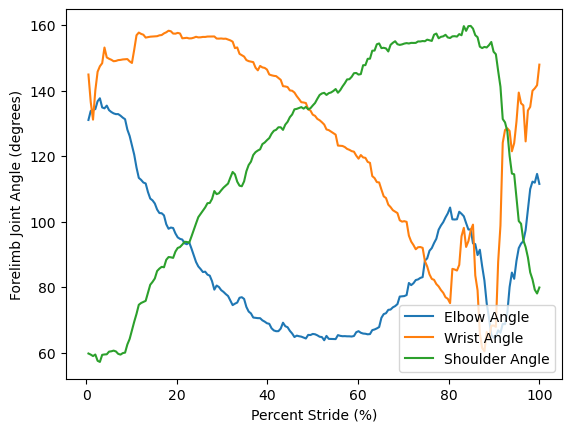

In [193]:
plt.figure(1)

plt.plot(p_stride1, elbow, label='Elbow Angle')
plt.plot(p_stride1, wrist, label='Wrist Angle')
plt.plot(p_stride1, shoulder, label='Shoulder Angle')
plt.xlabel('Percent Stride (%)')
plt.ylabel('Forelimb Joint Angle (degrees)')
plt.legend()
plt.show()

Vector Based 3D Joint Angle Calculations

Note: these calculations are used to varify the trig based calculations are correct
The results from vector based joint calculations will be (should be) identical to those performed via trig. in the section above, just cross varifying with matrix math. Here's a resource to understand the matrix math operations.
Forelimb Elbow Joint
A = shoulder point (X, Y, Z) = [pt4_X, pt4_Y, pt4_Z]
B = elbow point (X, Y, Z) = [pt2_X, pt2_Y, pt2_Z]
C = wrist point (X, Y, Z) = [pt3_X, pt3_Y, pt3_Z]

In [216]:
#np.array creates teh array and .T trsnaposes the original array  

A = np.array([pt4_X_s1, pt4_Y_s1, pt4_Z_s1]).T  #% shoulder
#A = np.transpose(A)
display(A)
B = np.array([pt2_X_s1, pt2_Y_s1, pt2_Z_s1]).T   #% elbow
print(B.shape)
C = np.array([pt3_X_s1, pt3_Y_s1, pt3_Z_s1]).T   #% wrist

print(C.shape)

array([[-1.3089889e+01,  5.4091077e+01,  7.0579872e+01],
       [-1.3047094e+01,  5.4124996e+01,  7.0586657e+01],
       [-1.2996292e+01,  5.4344594e+01,  7.0615487e+01],
       [-1.2941999e+01,  5.4578458e+01,  7.0646167e+01],
       [-1.2897702e+01,  5.4850277e+01,  7.0680575e+01],
       [-1.2860900e+01,  5.5044347e+01,  7.0705457e+01],
       [-1.2381262e+01,  5.5162732e+01,  7.0857484e+01],
       [-1.2206794e+01,  5.5284002e+01,  7.1001008e+01],
       [-1.1908329e+01,  5.5265460e+01,  7.1192899e+01],
       [-1.1770258e+01,  5.5260592e+01,  7.1320154e+01],
       [-1.1741784e+01,  5.5304397e+01,  7.1327046e+01],
       [-1.1721290e+01,  5.5343012e+01,  7.1332832e+01],
       [-1.1684917e+01,  5.5472684e+01,  7.1350271e+01],
       [-1.1646241e+01,  5.5626338e+01,  7.1370648e+01],
       [-1.1606686e+01,  5.5652044e+01,  7.1376020e+01],
       [-1.1564849e+01,  5.5683957e+01,  7.1382230e+01],
       [-1.1533829e+01,  5.5769378e+01,  7.1229187e+01],
       [-1.1074841e+01,  5.5762

(198, 3)
(198, 3)


Example Calculation 1
Determining the 2 vectors to characterize the 3D angle by making the elbow (or joint of interest) the origin. The elbow pt is set as the origin for the two vectors by subtracting the elbow point from the should and wrist point.

In [222]:
A0 = A - B #% vector from elbow (origin) to shoulder
#print(A0.shape)
B0 = B - B  #% origin (0,0,0)
#print(B0)
C0 = C - B  #% vector from elbow (origin) to wrist
print(C0)

[[10.848979  2.714715  1.916155]
 [10.882797  3.197577  2.246002]
 [11.246091  3.120279  3.380738]
 [11.443566  3.124283  4.034348]
 [11.126209  3.088156  4.070106]
 [11.14547   3.047091  4.275707]
 [11.355999  2.999538  4.315572]
 [11.479494  3.09452   4.078757]
 [11.16972   3.199738  3.98247 ]
 [11.173013  3.108148  3.971039]
 [11.174273  3.037358  3.962266]
 [11.177346  2.988954  3.956401]
 [11.174566  2.934713  3.949417]
 [11.039752  2.78531   3.992444]
 [10.900674  2.600876  4.197489]
 [10.850916  2.496059  4.182748]
 [10.832546  2.394478  4.169343]
 [10.818929  2.248882  4.250996]
 [10.813422  2.156419  4.30663 ]
 [10.813007  2.112552  4.301631]
 [10.805852  2.001256  4.287914]
 [10.769946  1.616714  4.236749]
 [10.727037  1.44927   4.214267]
 [10.729278  1.401846  4.2089  ]
 [10.729395  1.319835  4.199174]
 [10.733219  1.31871   4.19991 ]
 [10.727981  1.241679  4.190151]
 [10.725236  1.193119  4.184015]
 [10.721621  1.164302  4.180331]
 [10.717065  1.141362  4.177291]
 [10.70999

Calculating the angle between two vectors, using the following formula,
    a • b=a *b * cos (a) 

Which can be re-arranged to,
    a = arccos {(a • b)/ |a| * |b|}.


Using the algebraic formula for the dot product (the sum of the products of the vectors' components), and substitute in the magnitudes, the equation is:
    a = arccos((x_a * x_b+ y_a * y_b + z_a + z_b)/ √(x_a^2 + y_a^2 + z_a^2) * √x_b^2+y_b^2 +zb^2) 

In [297]:
dot_product = (A0[:,0] * C0[:,0]) + (A0[:,1] * C0[:,1]) + (A0[:,2] * C0[:,2])  #this gives the right results

# Calculate the magnitudes of A0 and C0 vectors
mag_A0 = np.sqrt(A0[:,0]**2 + A0[:,1]**2 + A0[:,2]) #in the matlab it does not have the ** (.^2)which gives different result, however based on the equation, there should be a **
mag_C0 = np.sqrt(C0[:,0]**2 + C0[:,1]**2 + C0[:,2]**2)

# Calculate the cosine of the angle between A0 and C0 vectors
cos_angle = dot_product / (mag_A0 * mag_C0)

# Calculate the angle in degrees using arccosine
alpha = np.degrees(np.arccos(cos_angle) )
#alpha = np.degrees(alpha_)

display(alpha)
print(alpha.shape)


array([134.8985536 , 137.97833643, 138.33289572, 138.78340583,
       143.2873476 , 146.19340668, 142.90135844, 142.82379815,
       143.49148072, 141.18827434, 140.39273457, 139.82213297,
       139.60613243, 139.37512165, 137.97575362, 137.17276869,
       136.9469595 , 132.6916053 , 130.36468773, 127.24294283,
       123.92363494, 119.42957779, 115.81879977, 115.12036449,
       114.18204102, 113.88973779, 110.93961843, 108.72233403,
       108.18491912, 107.13306962, 105.15336793, 103.97524676,
       103.9610464 , 103.2197431 , 100.19204995,  98.70586204,
        99.12581012,  98.80460669,  96.97567846,  95.66570786,
        95.16608197,  94.90859025,  93.66462105,  93.36741268,
        94.03118697,  91.93579201,  89.67419669,  87.48761197,
        85.97566689,  85.09579296,  84.09893777,  84.26227037,
        83.30515636,  82.96293502,  81.17895722,  78.51168196,
        79.84518909,  79.35204865,  78.35339825,  77.79589685,
        77.07344077,  76.45800291,  75.02670571,  73.58

(198,)


Example Calculation 2
Another way to perform this calculation, after determining the two vectors from their start and end point. Find the dot product of the two vectors

Finding the total length of the array allows us to calculate the dot product throughout the array.


//WILL LEAVE THIS HERE BC ITS NOT USED IN THE MATLAB SCRIPT BUT JUST IN CASE WE USE IT IN THE FUTURE 

    %[length,~] = size(A0);
    %c = dot(A0,C0,length);

Calculating the sum across the x, y, z pts/matrix rows to find the dot product. 2 sums across successive elements across rows.
    %VaVb_dotprod = sum(c,2);

Or, it might be best to perform the dot product as such


In [260]:
VaVb_dotprod = np.sum(A0 * C0, axis=1) 
display(VaVb_dotprod.shape)

(198,)

Next determine the magnitude of the vectors

    |Va| = √(Xa^2 + ya^2 + za^2)
    |Vb| = √(Xb^2 + yb^2 + zb^2)

In [262]:
A0_mag = np.sqrt(A0[:,0]**2+A0[:,1]** 2+A0[:,2]) #SHOULDNT TIS BE **2 ? BASED ON THE EQUATION
C0_mag = np.sqrt(C0[:,0]**2+C0[:,1]**2+C0[:,2]**2)

Finally, use the transformed dot product equation:

In [264]:
alpha2 = np.degrees(np.arccos(VaVb_dotprod/(A0_mag*C0_mag)))


Example Calculation 3
Setting up your two vectors, one originating from the elbow to the shoulder and the other originating from the elbow to the wrist.


Where,
Va = vector from the elbow to the shoulder (pt 4 and pt 3)
Vb = vector from the elbow to the wrist (pt 4 and pt 5).

In [266]:
Va = A-B;   #  shoulder pt minus elbow pt; vector from shoulder to elbow
display(Va)
Vb = C-B;   # wrist pt minus elbow pt; vector from wrist to elbow
display(Vb)

array([[ -4.347663,  -8.865379,  -3.374198],
       [ -4.399606,  -8.909074,  -3.350308],
       [ -4.400949,  -8.902695,  -3.3502  ],
       [ -4.393129,  -8.890722,  -3.415672],
       [ -4.680533,  -8.754616,  -4.009242],
       [ -4.780371,  -8.660725,  -4.500841],
       [ -4.338146,  -8.777353,  -4.579534],
       [ -4.297699,  -8.781511,  -4.656021],
       [ -4.351675,  -8.875119,  -4.585422],
       [ -4.229127,  -9.03504 ,  -4.478448],
       [ -4.209983,  -9.10907 ,  -4.486843],
       [ -4.197489,  -9.168045,  -4.493731],
       [ -4.167424,  -9.10364 ,  -4.484816],
       [ -4.2617  ,  -9.112802,  -4.423205],
       [ -4.363155,  -9.294053,  -4.215865],
       [ -4.370392,  -9.388703,  -4.227334],
       [ -4.360853,  -9.435721,  -4.398004],
       [ -3.915286,  -9.626361,  -4.184234],
       [ -3.602687,  -9.680868,  -4.135221],
       [ -3.046379,  -9.663858,  -4.115674],
       [ -2.567693,  -9.715807,  -4.107061],
       [ -2.176498,  -9.861624,  -4.1119  ],
       [ -

array([[10.848979,  2.714715,  1.916155],
       [10.882797,  3.197577,  2.246002],
       [11.246091,  3.120279,  3.380738],
       [11.443566,  3.124283,  4.034348],
       [11.126209,  3.088156,  4.070106],
       [11.14547 ,  3.047091,  4.275707],
       [11.355999,  2.999538,  4.315572],
       [11.479494,  3.09452 ,  4.078757],
       [11.16972 ,  3.199738,  3.98247 ],
       [11.173013,  3.108148,  3.971039],
       [11.174273,  3.037358,  3.962266],
       [11.177346,  2.988954,  3.956401],
       [11.174566,  2.934713,  3.949417],
       [11.039752,  2.78531 ,  3.992444],
       [10.900674,  2.600876,  4.197489],
       [10.850916,  2.496059,  4.182748],
       [10.832546,  2.394478,  4.169343],
       [10.818929,  2.248882,  4.250996],
       [10.813422,  2.156419,  4.30663 ],
       [10.813007,  2.112552,  4.301631],
       [10.805852,  2.001256,  4.287914],
       [10.769946,  1.616714,  4.236749],
       [10.727037,  1.44927 ,  4.214267],
       [10.729278,  1.401846,  4.2

Calculating the dot product

Dot product squares v's and take the same across the matrix

One way to calculate the dot product of the two vectors

In [278]:
dot_V = np.sum(Va * Vb, axis=1)

print(dot_V)


[-77.70016831 -83.89226756 -88.59851364 -91.83020276 -95.43024824
 -98.91377614 -95.3552942  -95.50074955 -95.26635235 -93.11842412
 -92.48907147 -92.09865348 -90.99813375 -90.0894879  -89.43005662
 -88.53938593 -88.16955426 -81.79491322 -77.64224937 -71.06003086
 -64.80065195 -56.80527973 -50.39706007 -49.31667879 -47.90630822
 -47.07206848 -41.66469355 -37.49502413 -36.38936603 -34.32778264
 -30.44587575 -28.16235743 -27.98498961 -26.55473164 -20.5359155
 -17.44331882 -18.07128529 -17.64029179 -14.06388438 -11.47456035
 -10.43382596  -9.87786982  -7.31338315  -6.62567111  -7.79863443
  -3.77108304   0.64125956   4.98441038   7.8728848    9.49981044
  11.33338502  11.75474591  13.78743048  14.36352431  18.04829594
  23.76700222  20.06080319  20.7984491   22.75616984  23.78316097
  24.97208202  26.15935755  29.14656604  32.32680887  30.61219939
  29.47043973  25.4631531   24.91062242  25.93959025  31.33696793
  34.82325996  36.05487578  38.98536566  38.9266834   38.98908785
  37.986123

Characterizing the vector magnitude for Va and Vb

In [279]:
sv_Va = Va*Va
dp_Va = np.sum((sv_Va), axis=1)
mag_Va = np.sqrt(dp_Va)

sv_Vb = Vb*Vb
dp_Vb = np.sum((sv_Vb), axis=1)
mag_Vb = np.sqrt(dp_Vb)

In [282]:
#Solving for theta:
theta_e = np.degrees(np.arccos(dot_V /(mag_Va *mag_Vb)))
display(theta_e)

array([131.016148  , 133.78107631, 134.08326846, 134.32755129,
       136.72206693, 137.6226166 , 134.83001433, 134.55799845,
       135.38304404, 134.00200569, 133.43105205, 133.02212198,
       132.79178225, 132.80014916, 132.32265495, 131.72053096,
       131.23333402, 128.07389339, 126.12105669, 123.32272913,
       120.39744213, 116.47515476, 113.34179351, 112.7331763 ,
       111.91766487, 111.63861302, 109.00743441, 107.02015557,
       106.46808655, 105.51176892, 103.67955282, 102.5990919 ,
       102.54687483, 101.89157038,  99.1753488 ,  97.80486974,
        98.18161492,  98.02752893,  96.37377127,  95.1821259 ,
        94.72442773,  94.51527967,  93.37432065,  93.09607095,
        93.70797408,  91.7833761 ,  89.69881197,  87.67677791,
        86.30680694,  85.51282315,  84.6037834 ,  84.71328059,
        83.81259739,  83.50143011,  81.79583761,  79.22989315,
        80.48315455,  80.0284354 ,  79.07375948,  78.54210006,
        77.86736537,  77.28418244,  75.91853236,  74.50

Hindlimb Knee Joint

Points to generate vectors
D = hip point (X, Y, Z) = [pt7_X, pt7_Y, pt7_Z]
E = knee point (X, Y, Z) = [pt5_X, pt5_Y, pt5_Z]
F = ankle point (X, Y, Z) = [pt6_X, pt6_Y, pt6_Z]

In [291]:
D = np.array([pt7_X_s1, pt7_Y_s1, pt7_Z_s1]).T  #hip
display(D)
E = np.array([pt5_X_s1, pt5_Y_s1, pt5_Z_s1]).T    #knee
display(E)
F = np.array([pt6_X_s1, pt6_Y_s1, pt6_Z_s1]).T    #ankle
print(F)

array([[-42.480322,  52.388633,  66.62912 ],
       [-42.252849,  52.363345,  66.574604],
       [-42.234747,  52.369198,  66.549254],
       [-41.869682,  52.852388,  66.669014],
       [-41.614914,  52.933284,  66.725585],
       [-41.43077 ,  53.149338,  66.880551],
       [-41.32581 ,  53.144328,  66.885608],
       [-41.242316,  53.238299,  66.911648],
       [-41.220803,  53.333547,  66.949667],
       [-41.19153 ,  53.330639,  66.954562],
       [-40.939097,  53.323687,  66.954968],
       [-40.911943,  53.372211,  66.965496],
       [-40.828158,  53.365881,  66.975273],
       [-40.818401,  53.364934,  66.976889],
       [-40.691612,  53.354808,  67.003843],
       [-40.515757,  53.534475,  67.09771 ],
       [-40.515757,  53.534475,  67.09771 ],
       [-40.336457,  53.57232 ,  67.135208],
       [-40.103849,  53.699153,  67.234493],
       [-40.08433 ,  53.6974  ,  67.237685],
       [-40.065133,  53.850769,  67.25475 ],
       [-39.964046,  53.948734,  67.271049],
       [-3

array([[-42.744714,  62.53353 ,  72.008735],
       [-42.672075,  62.506615,  71.975362],
       [-42.672075,  62.506615,  71.975362],
       [-42.672075,  62.506615,  71.975362],
       [-42.672075,  62.506615,  71.975362],
       [-42.672075,  62.506615,  71.975362],
       [-42.672075,  62.506615,  71.975362],
       [-42.644838,  62.949047,  72.036871],
       [-42.644838,  62.949047,  72.036871],
       [-42.644838,  62.949047,  72.036871],
       [-42.644838,  62.949047,  72.036871],
       [-42.644838,  62.949047,  72.036871],
       [-42.627606,  63.194721,  72.071388],
       [-42.609749,  63.638469,  72.131331],
       [-42.609749,  63.638469,  72.131331],
       [-42.609749,  63.638469,  72.131331],
       [-42.609749,  63.638469,  72.131331],
       [-42.590301,  63.834565,  72.159872],
       [-42.573045,  64.080476,  72.194379],
       [-42.340125,  64.197487,  72.326929],
       [-42.147049,  64.21657 ,  72.445911],
       [-42.147049,  64.21657 ,  72.445911],
       [-4

[[-52.149068  54.476672  68.632958]
 [-52.115222  54.461201  68.596014]
 [-52.115222  54.461201  68.596014]
 [-52.115222  54.461201  68.596014]
 [-52.115222  54.461201  68.596014]
 [-52.115222  54.461201  68.596014]
 [-51.841414  54.541667  68.254981]
 [-51.841414  54.541667  68.254981]
 [-51.841414  54.541667  68.254981]
 [-51.841414  54.541667  68.254981]
 [-51.7432    54.3199    68.290478]
 [-51.104098  54.430433  68.089553]
 [-51.025333  54.340077  68.09515 ]
 [-50.98098   54.332089  68.10372 ]
 [-50.98098   54.332089  68.10372 ]
 [-50.98098   54.332089  68.10372 ]
 [-50.98098   54.332089  68.10372 ]
 [-50.98098   54.332089  68.10372 ]
 [-50.98098   54.332089  68.10372 ]
 [-50.98098   54.332089  68.10372 ]
 [-50.98098   54.332089  68.10372 ]
 [-50.301949  54.333283  68.063066]
 [-50.101843  54.203432  67.880481]
 [-49.851097  54.200047  67.87951 ]
 [-49.424803  54.221177  67.764371]
 [-49.358455  54.210639  67.777168]
 [-49.33124   54.244478  67.787176]
 [-49.231995  54.419375  67.

Generating Vectors

Vc = vector from the knee to the hip (pt 8 and pt 7)
Vd = vector from the knee to the ankle (pt 8 and pt 9)

In [292]:
Vc = D-E    # pt6- pt7; vector from hip to knee
Vd = F-E    # pt8-pt7; vector from ankle to knee

Calculating the dot product for vectors Vc and Vd

In [295]:
VcVd_dotprod = np.sum(Vc*Vd,axis=1)
display(VcVd_dotprod)

array([ 97.40993918,  95.89903447,  95.76667128,  88.02713452,
        84.77930793,  80.77848115,  81.16159302,  88.12657797,
        86.98416222,  86.72088716,  86.5780031 ,  86.94068969,
        92.18297219, 101.37372004, 100.29801621,  96.77578425,
        96.77578425,  98.98625623, 100.72951701, 105.58848085,
       106.61007332, 106.35841693, 112.80111191, 115.60828815,
       123.48812821, 124.17324519, 121.60362838, 114.00181636,
       110.01501506, 115.66750808, 112.5065815 , 109.01934385,
       115.48670427, 114.6356229 , 119.82180946, 118.15922282,
       114.10448536, 114.10448536, 107.39882737, 106.45963482,
       106.97553694, 104.68170959, 101.75098598, 100.92016248,
        97.32163619,  97.17208563,  94.47976665,  87.11847169,
        87.83560751,  84.54366655,  80.47382421,  79.80028216,
        75.98658041,  74.72100841,  72.72971494,  68.53107771,
        70.790212  ,  70.790212  ,  70.8650251 ,  70.69820211,
        70.49595336,  66.24335555,  61.32562932,  57.47

Next determine the magnitude of the vectors
    |Vc| = √(xc^2 + yc^2 + zc^2)
    |Vc| = √(xd^2 + yd^2 + zd^2)

In [300]:
Vc_mag = np.sqrt(Vc[:,0]**2+Vc[:,1]**2+Vc[:,2]) #missing the **2 at the end?
Vd_mag = np.sqrt(Vd[:,0]**2+Vd[:,1]**2+Vd[:,2]**2)

In [301]:
#Finally, use the transformed dot product equation:
    
beta = np.degrees(np.arccos(VcVd_dotprod/(Vc_mag*Vd_mag)))

Old Way
Calculating the dot product; squares v's and take the same across the matrix

In [302]:
dot_V = np.sum((Vc*Vd), axis=1)

Calculating the product of the vector magnitude

/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_94544/3016443894.py:19: UserWarning: Legend does not support 'E' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Elbow Angle','Knee Angle')
/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_94544/3016443894.py:19: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Elbow Angle','Knee Angle')
/var/folders/nv/ymy6nb1d6wq1m3352zph86040000gn/T/ipykernel_94544/3016443894.py:19: UserWarning: Legend does not support 'b' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend('Elbow Angle','Kn

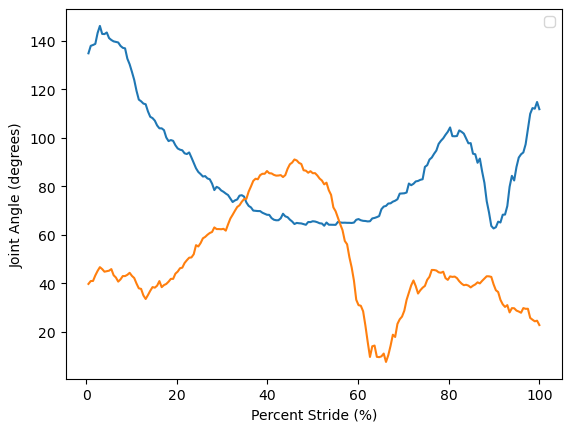

In [305]:
sv_Vc = Vc*Vc
dp_Vc = np.sum((sv_Vc), axis=1)
mag_Vc = np.sqrt(dp_Vc)
sv_Vd = Vd*Vd
dp_Vd = np.sum((sv_Vd),axis=1)
mag_Vd = np.sqrt(dp_Vd)
theta_k = np.degrees(np.arccos(dot_V/(mag_Vc*mag_Vd)))

#% Graphing FL & HL 3D Joint Angles (using matrix math)
#% FIXIT something weird here with graph imaginary numbers

#% Displaying |elbow| and |knee| angle over time.

#this figure has been comented out in matlab but it appears to be okay here 
plt.figure(2)
plt.plot(p_stride1,alpha2,p_stride1, beta)
plt.xlabel('Percent Stride (%)')
plt.ylabel('Joint Angle (degrees)')
plt.legend('Elbow Angle','Knee Angle')
plt.show()